## Avacado Project

Avocado is a fruit consumed by people heavily in the United States. In this dataset we have 18249 rows and 14 columns including both dependent and indpendent variables. The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying. Since the target variable is is continuous in nature will use Regresson models to predict the price of the fruit.

The following are the relevant columns in the dataset

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

1.We need to make a model that can consider the data provided and predict the Average Price using regression.

We need to make a model that can consider the data and predict the region using classification

## 1. Average Price using regression

In [1]:
#Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
# Importing data Set
data=pd.read_csv(r"C:\DT\avocado.csv")

In [5]:
data

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Total 18249 rows and 14 columns we have, from this it is clear we does not have any use of uunamed:0 coloumns so we can remove that
Also Xlarge bags shows onl 0 value.that too we will check

In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)# removing data

In [7]:
data['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

So there are different values, the data range have high differance, most of values are 00

### Exploratory Data Analysis (EDA)

In [8]:
# Checking the dimension of the dataset
data.shape

(18249, 13)

In [9]:
# Checking the types of the dataset
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

So there are three features have object data type and remaining 10 features have numeric data types

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

In [10]:
# Changing date column from object type to Date Type
data['Date']=pd.to_datetime(data['Date'])

In [11]:
# Now again check the types
data.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [12]:
# Now Seperate date and month
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

In [13]:
data.drop("Date",axis=1,inplace=True)

In [14]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [15]:
# To get good overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


While looking this we can see that there is no null value in our data

In [16]:
# Checking number of unique values in each column
data.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

In [17]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [18]:
# Now let us check any duplicate value present in our data
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(18249, 14)

No duplicate data is present in our dataset

In [20]:
# List of values in the target variable
data["AveragePrice"].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

from this its clear that our problem is linear

In [21]:
# Checking wheather the dataset contains any space
data.loc[data['AveragePrice']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

No Spaces where present in our data

In [22]:
# Statistical summary of dataset
data.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

while looking this we can identify that there is a huge data range in some of the features

The counts of all the columns are same which means there are no null values present in the daaset.

The mean is greater than the median in most of the columns which means they are skewed to right.

In some of the columns median is greater than the mean, hence they are skewed to left.

In Total Bags feild there is a huge gap in values

### Data Visualization

In [23]:
# seprerating categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


Only two field have object type values, as we find earlier

In [24]:
# Now seperating numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


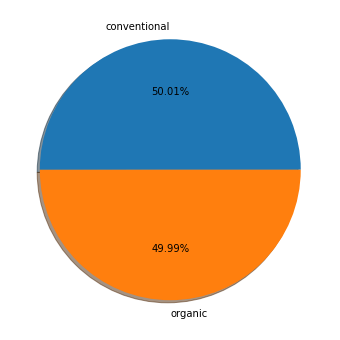

In [25]:
#Visualize the count of 'type'feature of the avocado
print(data["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(data['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products were not natuaral amd inorganic.But both types have equal demand in market

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


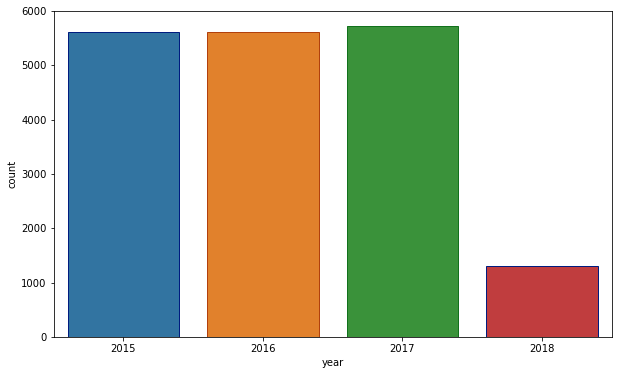

In [26]:
#Visualize the count of year
print(data["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(data["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

As already mentioned in problem statement this data is till May 2018, for the year 2018 the data is very less, and for remaining years the consumtion is alomost equal

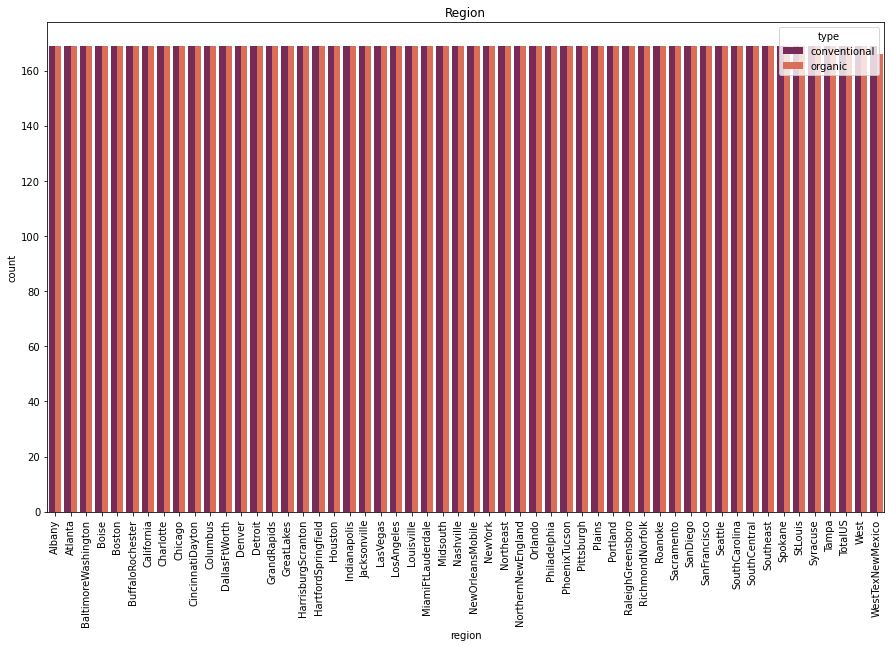

In [27]:
#Visualize the count of Region
plt.figure(figsize=(15,9))
sns.countplot(data["region"],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observ that the demand for the fruit is same in almost all the region

### Let us find the relation between each other by ploting pair pot

<Figure size 1800x1800 with 0 Axes>

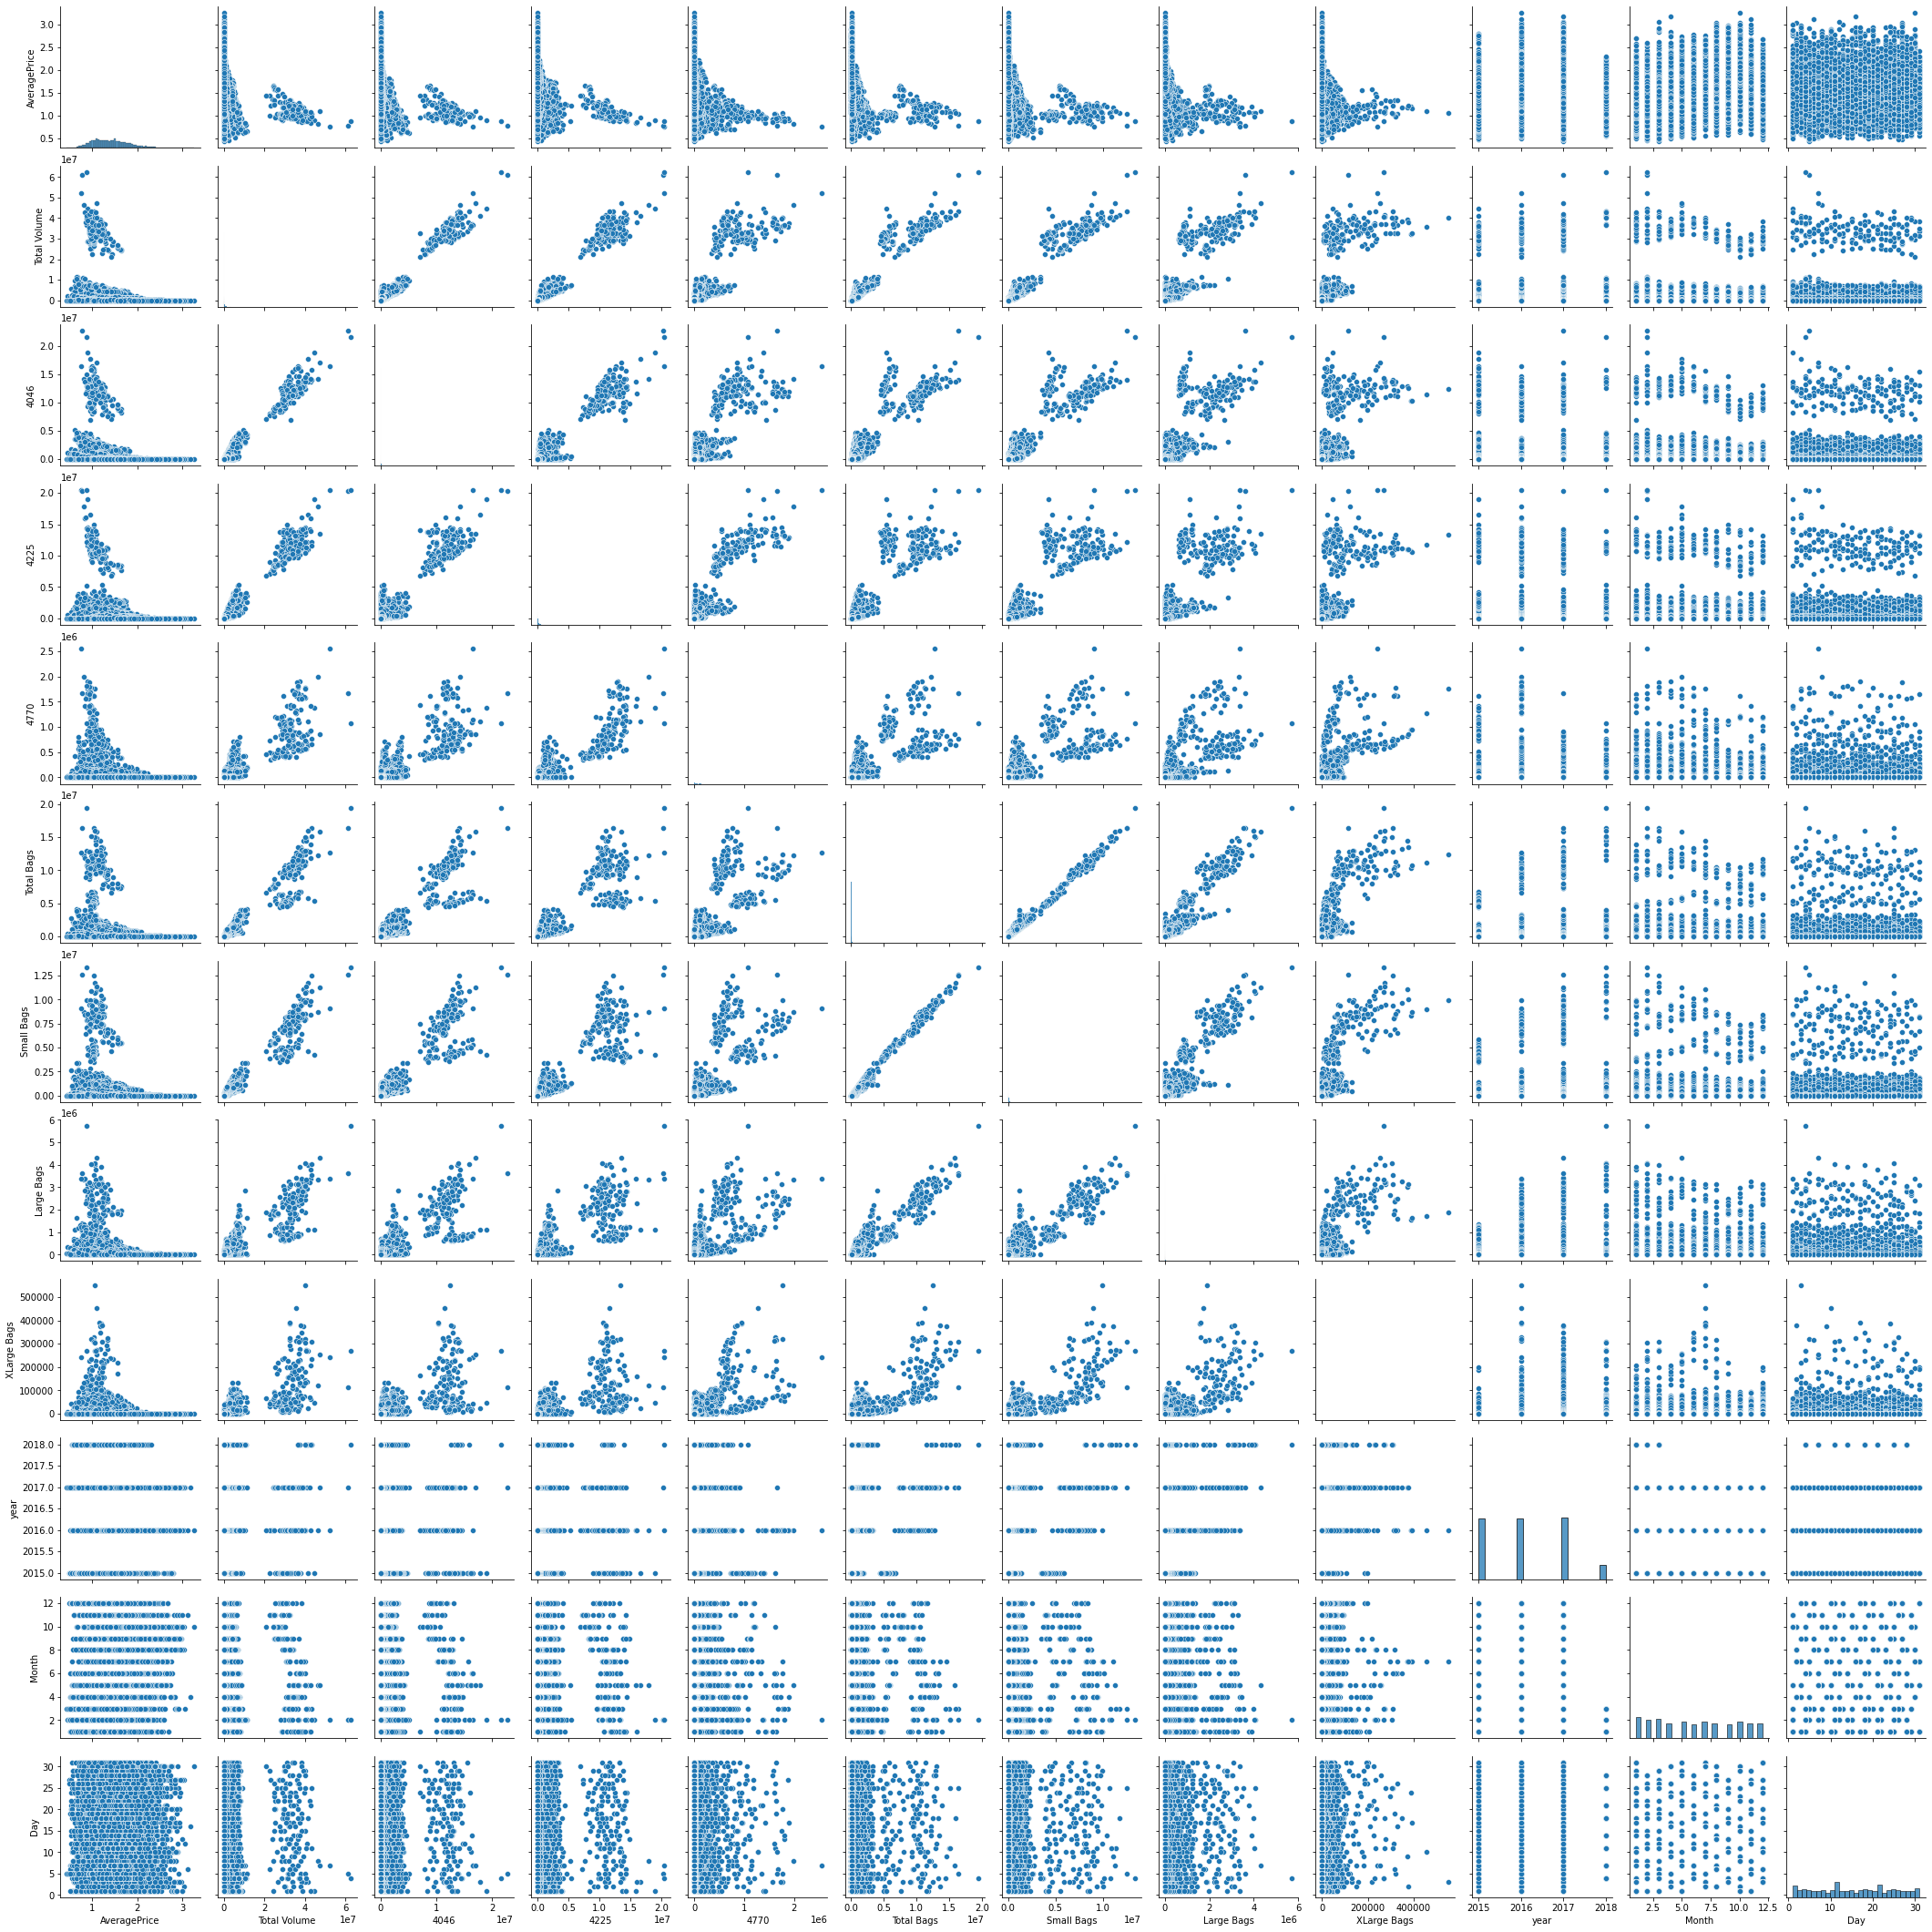

In [28]:
plt.figure(figsize=(25,25))
sns.pairplot(data)
plt.show()

This figures shows us that there is a strong relation between total bangs and small bags

From this figure we can assume that there is high multicolinearity exosts we ween variables

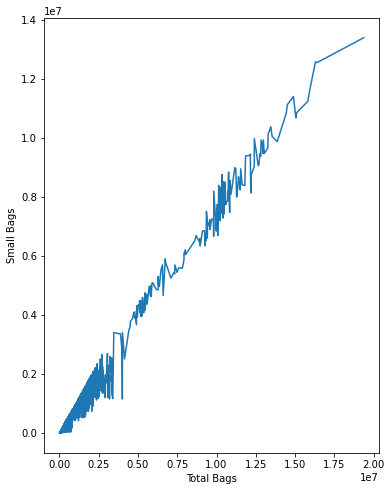

In [29]:
#let us plot paiwise where we feel high relation

plt.figure(figsize=(6,8))
sns.lineplot('Total Bags','Small Bags',data=data)
plt.show()

This shows us that there is high relation between these too, That means most of the customers were using small bags

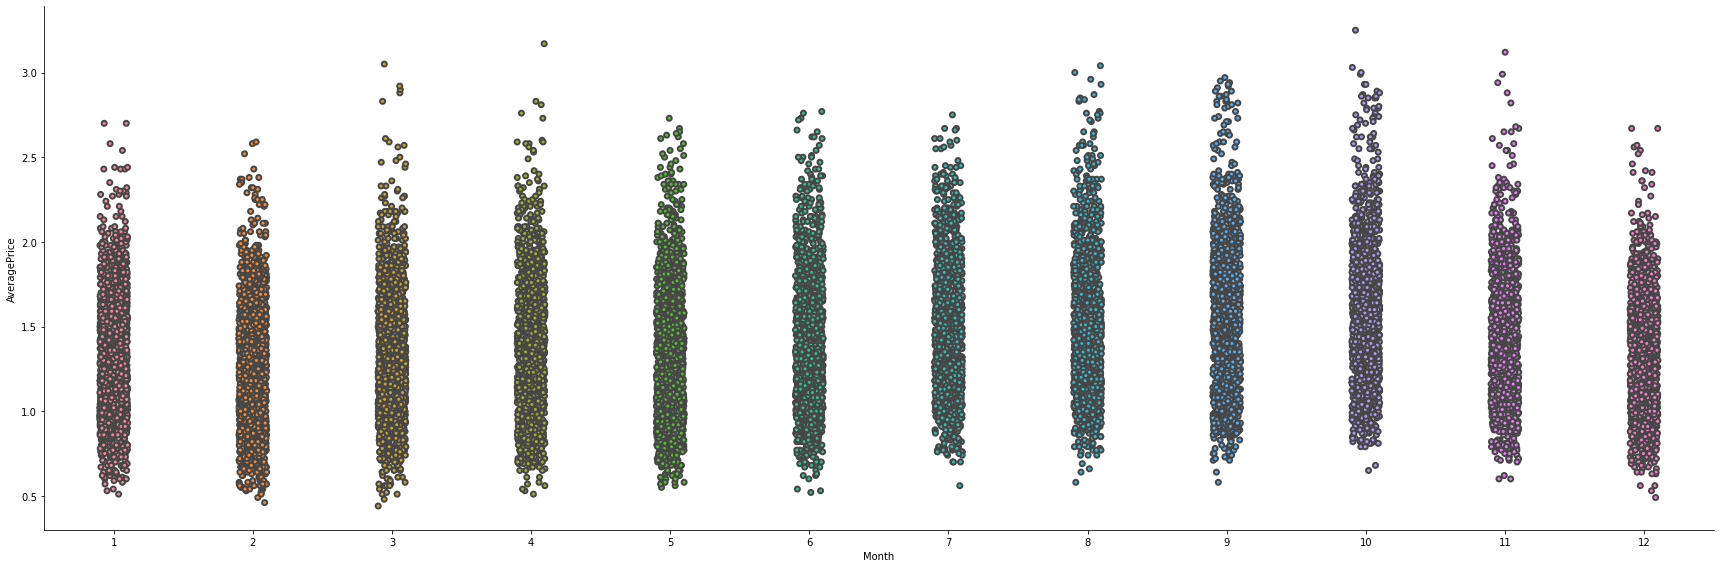

In [30]:
# Relationship between Average Price and Month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=data,height=8, linewidth=2, aspect=3)
plt.show()

This shows throughout the period the price of the items where same, comparetevily high during August to october months

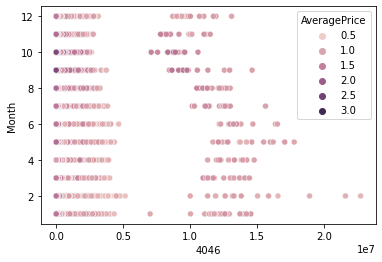

In [31]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4046", y = "Month",hue='AveragePrice',data=data)
plt.show()

During the perion August to November the average price is high, and during feb, may the sale of 4046 catogory is good, more kilograms are purchased. Usualy customers prefer 0. to 0.5 valumes of items

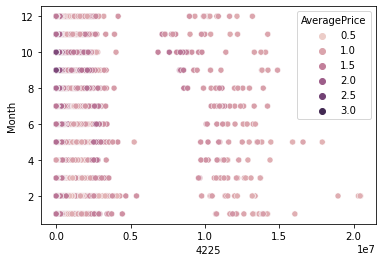

In [32]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4225", y = "Month",hue='AveragePrice',data=data)
plt.show()

his figuare also shows same results, but 4225 have goodquality campared to 4046 as the avage price of 4225 is high

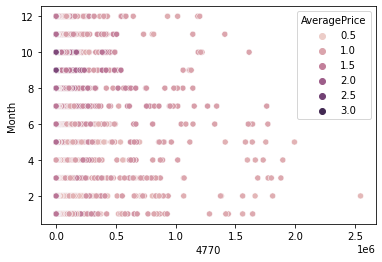

In [33]:
# average price as hue and months vs 4046
sns.scatterplot(x = "4770", y = "Month",hue='AveragePrice',data=data)
plt.show()

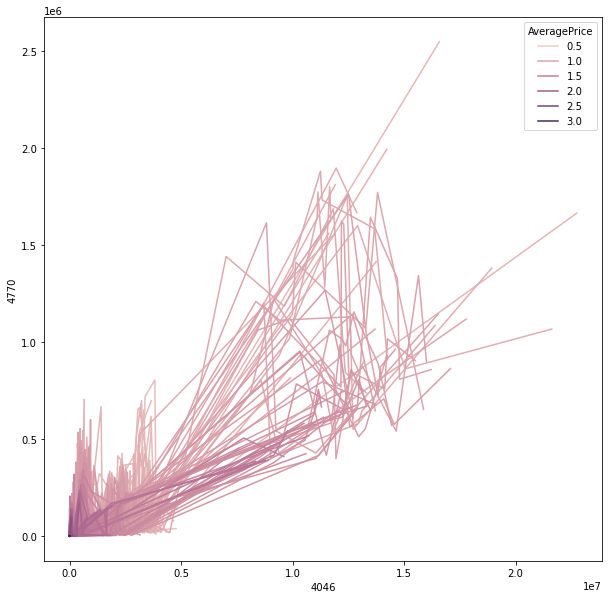

In [34]:
#let us plot count plot of 4046,4225,4770 
plt.figure(figsize=(10,10))
sns.lineplot('4046','4770',data=data,hue='AveragePrice')
plt.show()

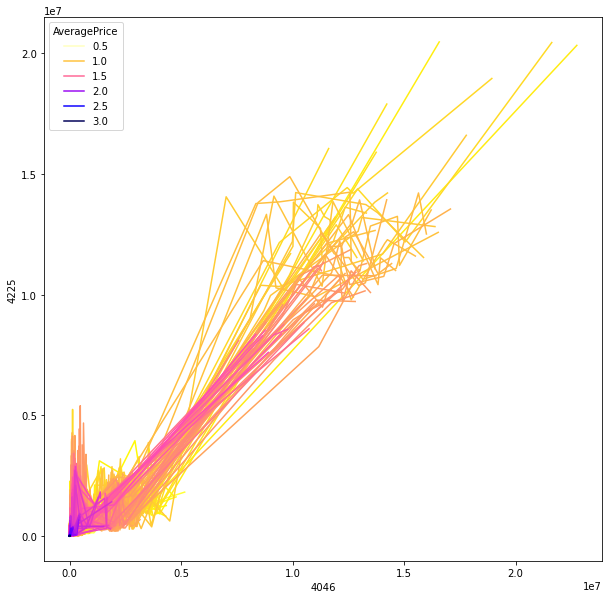

In [35]:
plt.figure(figsize=(10,10))
sns.lineplot('4046','4225',data=data,hue='AveragePrice',palette='gnuplot2_r')
plt.show()

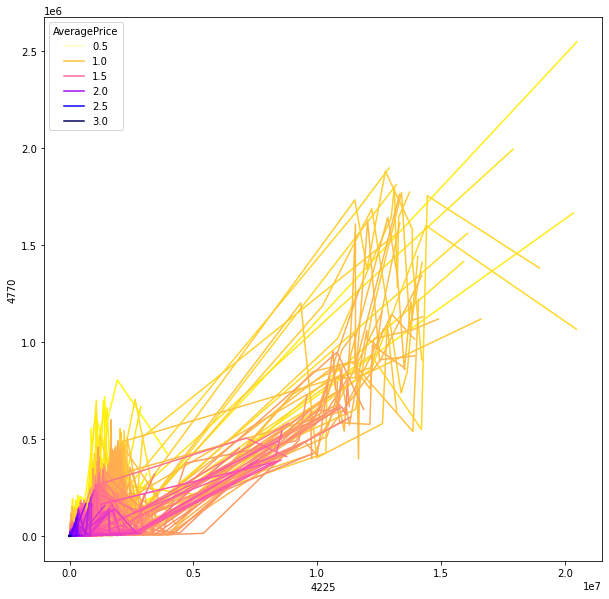

In [36]:
plt.figure(figsize=(10,10))
sns.lineplot('4225','4770',data=data,palette='gnuplot2_r',hue='AveragePrice')
plt.show()

The high price Avacado purchased in very leass quantity and lower price Avacado were purchased in high quantity

### Relationship between year and Total volume

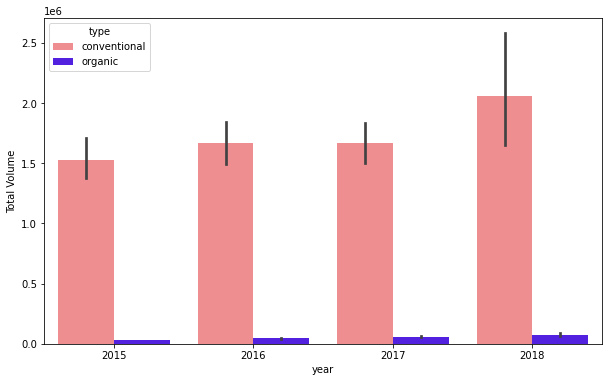

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=data,palette="gnuplot2_r")
plt.show()

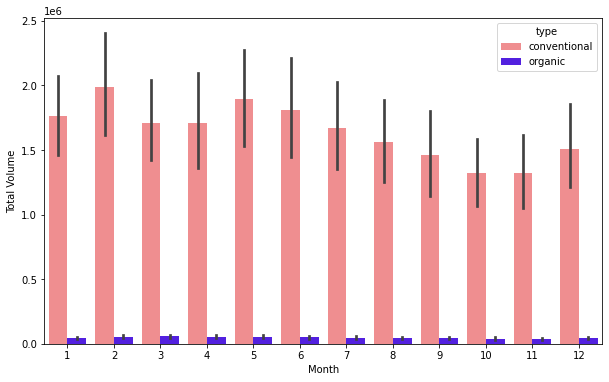

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month',y='Total Volume',hue="type",data=data,palette="gnuplot2_r")
plt.show()

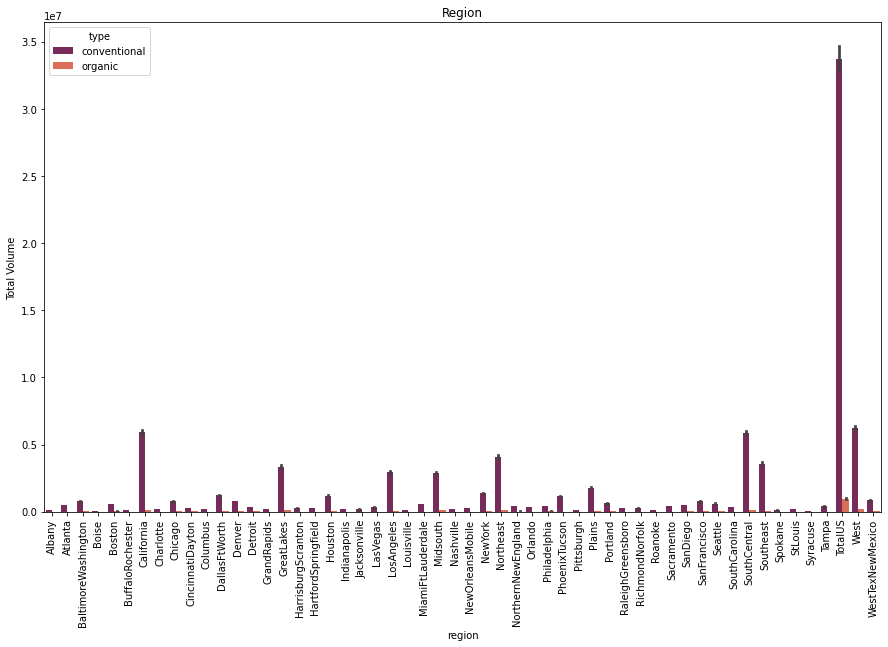

In [39]:
plt.figure(figsize=(15,9))
sns.barplot(data["region"],data['Total Volume'],palette="rocket",hue=data['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

#### High demands in California,SouthCentral and West 

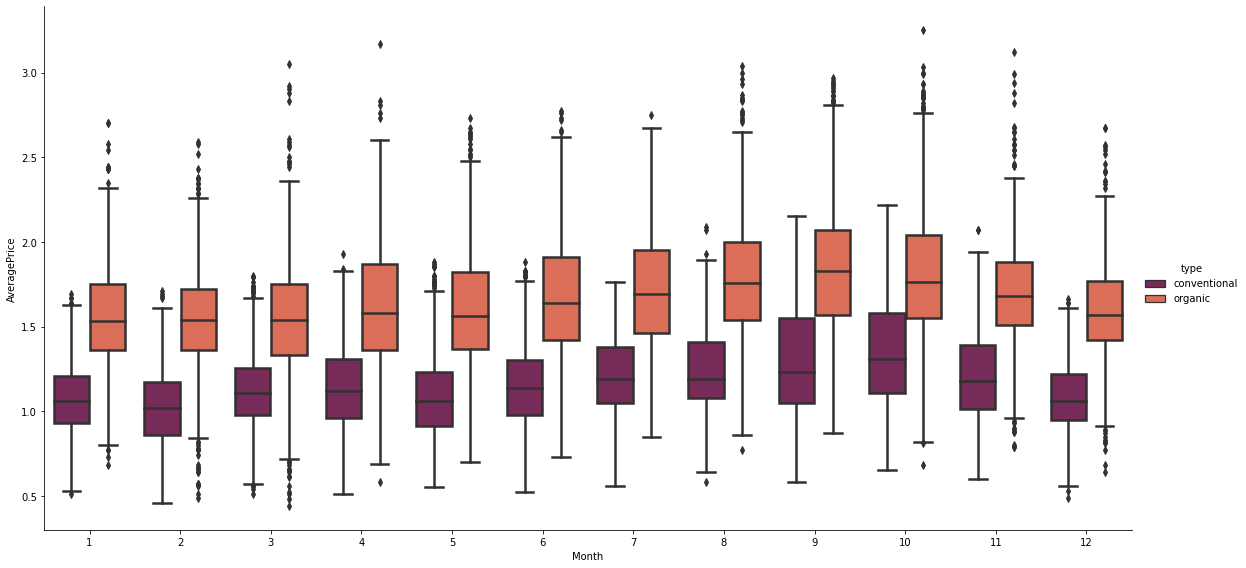

In [40]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=data, height=8, linewidth=2.5, aspect=2,palette="rocket");

We can observe that the pricd of the Organic type is high compared to coventional, eariler we observed that the demad for conventional is high, it may be because of this

### Relationship between Total volume and Avarage Price

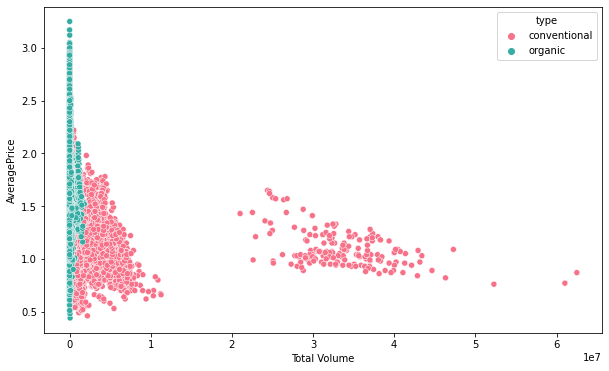

In [42]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=data,palette="husl")
plt.show()

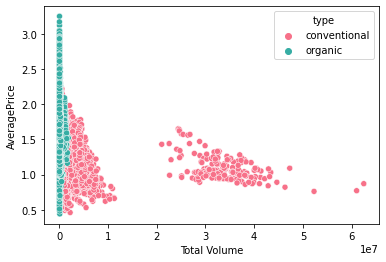

In [43]:
#### plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=data,palette="husl")
plt.show()

### Comparision between PLU sold vs day

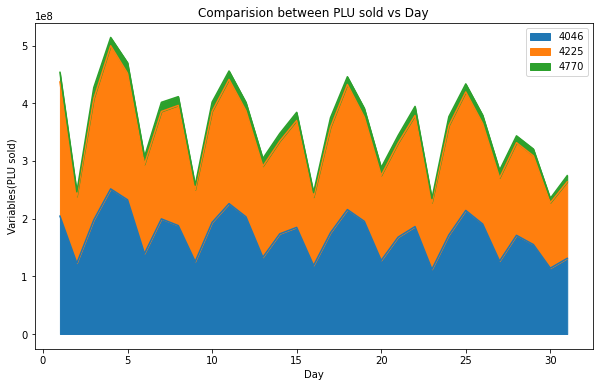

In [44]:
variables = data[['4046', '4225', '4770']].groupby(data.Day).sum()
variables.plot(kind='area', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

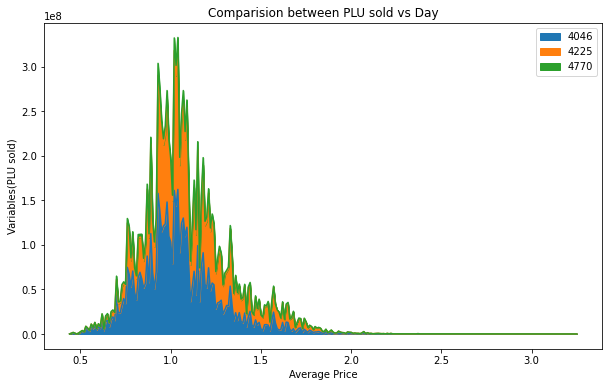

In [46]:
# Type of PLU sold and Average Price
variables = data[['4046', '4225', '4770']].groupby(data.AveragePrice).sum()
variables.plot(kind='area', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Average Price")
plt.ylabel("Variables(PLU sold)")
plt.show()

We can see that price of 4770 s much higher compared to other two.

### Comparision between Total Bags and Total Volume

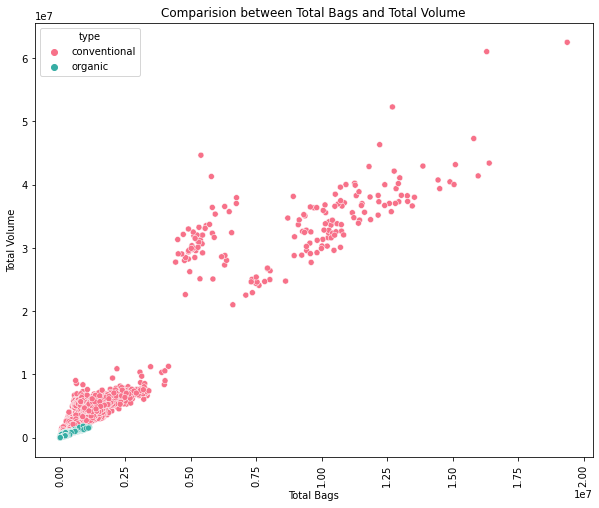

In [47]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="type",data=data,palette="husl")
plt.xticks(rotation=90)
plt.show()

### Comparision between Small Bags sold vs AveragePrice

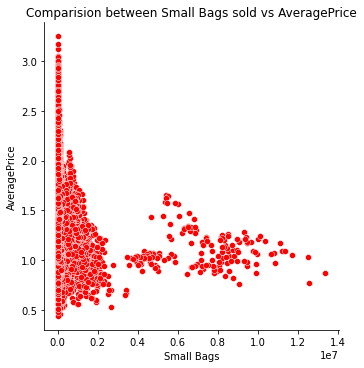

In [48]:
sns.relplot(data['Small Bags'],data['AveragePrice'],color="r");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

### Conclusion of Visualization

### Identifying the outliers

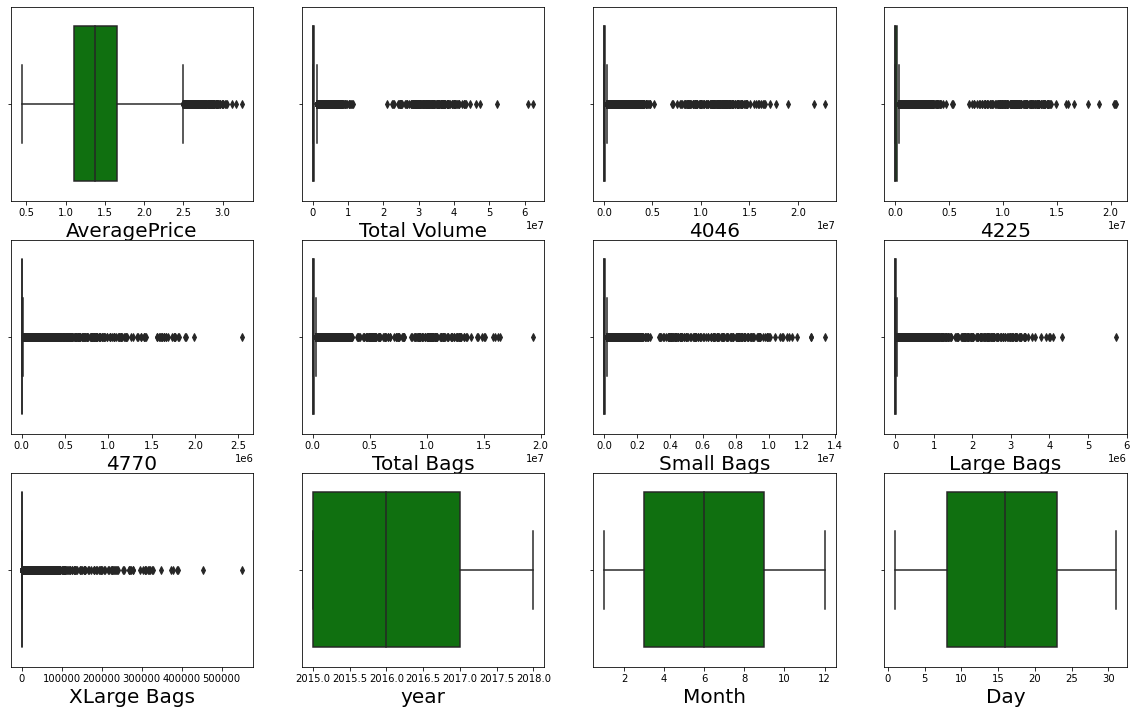

In [49]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

### 1. Zscore method

In [51]:
data.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [52]:
# Features containing outliers
feature_cols = data[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [53]:
# Creating new dataframe by removing zscore
new_df = data[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [54]:
data.shape

(18249, 14)

In [55]:
new_df.shape

(17782, 14)

In [56]:
# % of data loss 
(18249-17782)/18249*100

2.55904433119623

Only 2.5% of data is lost here so we can proceed

### 2. IQR (Inter Quantile Range) method

In [58]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1

In [59]:
new_df2=data[~((data <(Q1-1.5 * IQR))|(data >(Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
new_df2.shape

(11747, 14)

In [61]:
# %of data loss
(18249-11747)/18249*100

35.62934955340019

Please note that about 35.62% of data is lost, so we cannot use this method, So we will proceed with 1zscore method

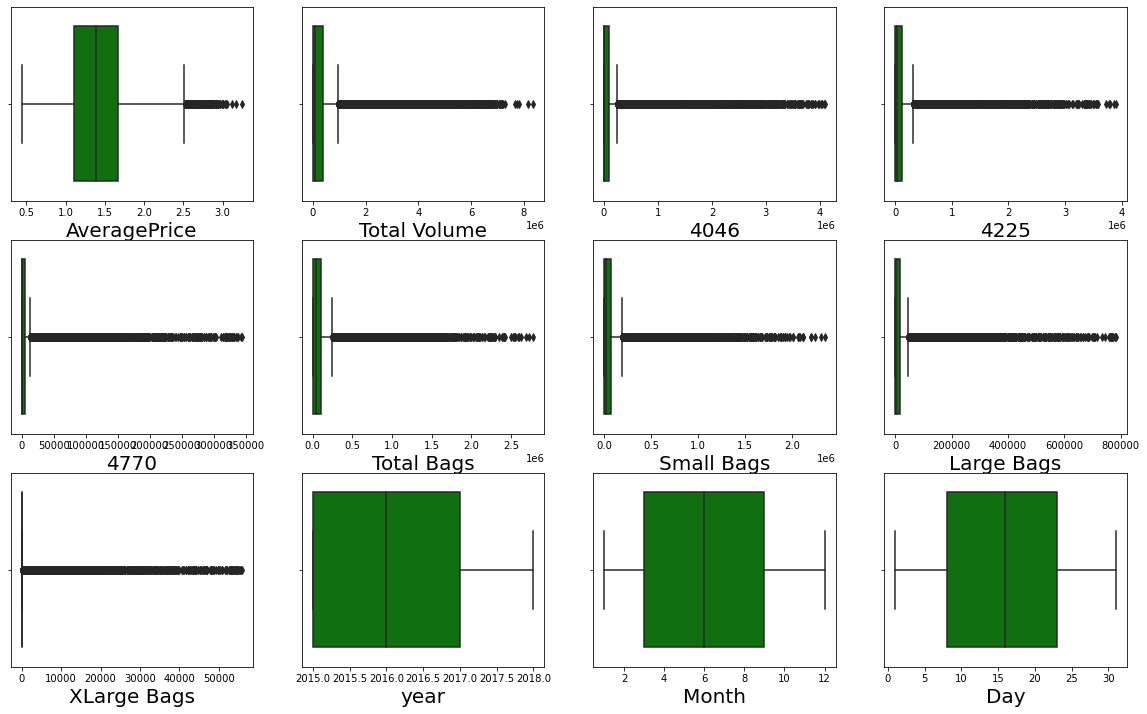

In [62]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The amount of outliers were reduced, now we will remove skewness

### Checking and removing Skewness

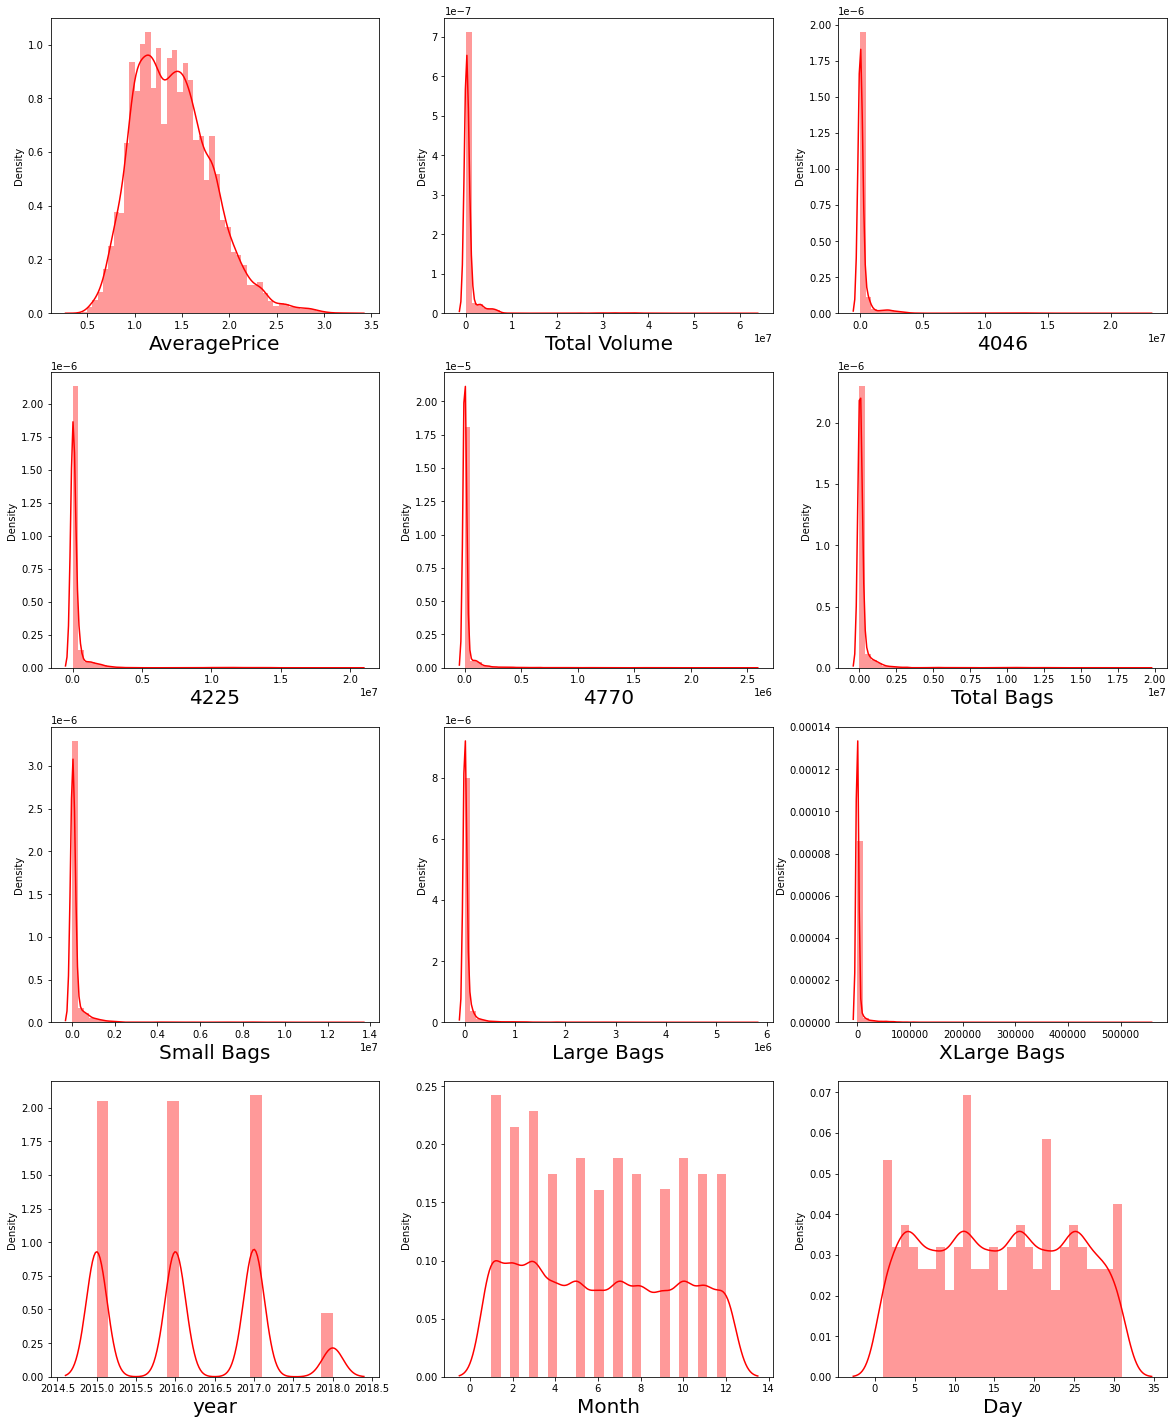

In [63]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Except year,month and day all features have high skewness so we will remove it

In [64]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [65]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']


In [66]:
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')



In [67]:
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [68]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

Almost skewness removed but still Xlarge Bags have some let us check with graph and remove it

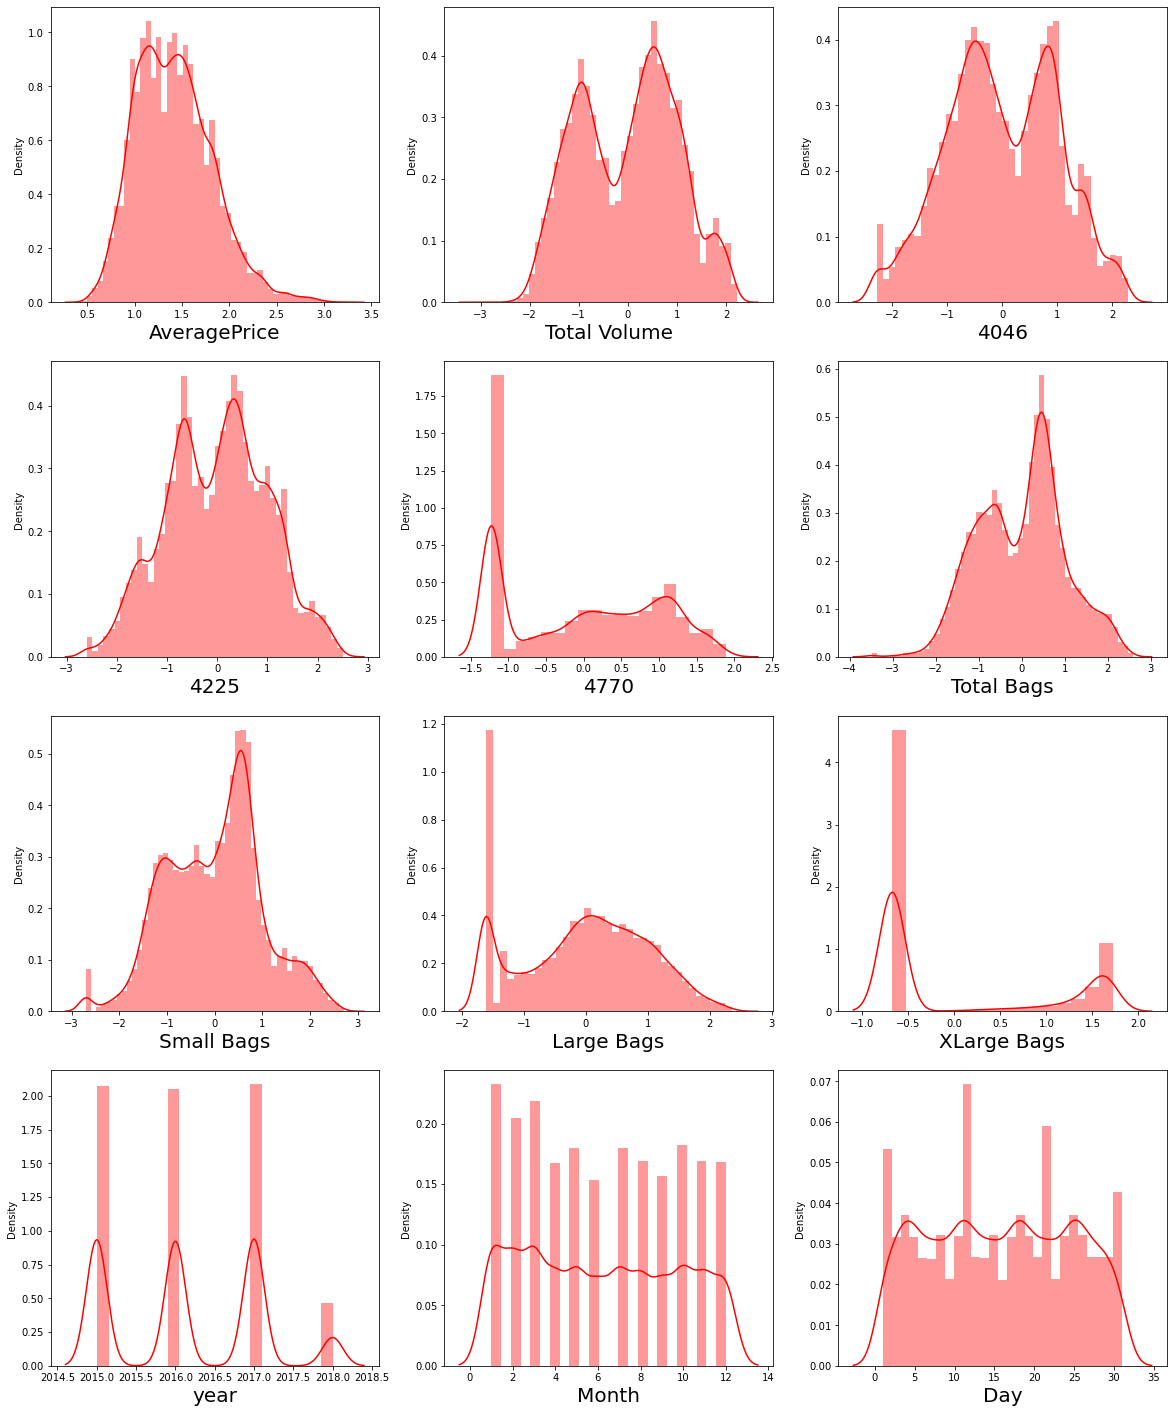

In [69]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

So we will try to remove the same by log1 method

In [70]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [71]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [72]:
# let us try one more time for removal

In [73]:
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)

In [74]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

### Encoding the categorical columns using Label Encoding

In [75]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

## Correlation using HEAT map

In [76]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.393528      0.627310  0.573589  0.580290  0.615107   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.393528  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.627310 -0.800828   
4046            0.799354    0.778765    0.601899     0.573589 -0.725826   
4225            0.818511    0.784901    0.614878     0.580290 -0.747722   
4770            0.761641    0.754305    0.548457     0.615107 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.609370 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.597809 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.449473 -0.500026   
XLarge Bags     0.609370    0.597809    0.449473     1.000000 -0.673864   
type           -0.725686   -0.720466   -0.500026    -0.673864  1.000000   
year            0.210924    0.185955    0.190295     0.153607  0.007399   
region          0.065996    0.051985    0.086573    -0.015786  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.022063 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.011528 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.153607 -0.015786  0.022063  0.011528  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

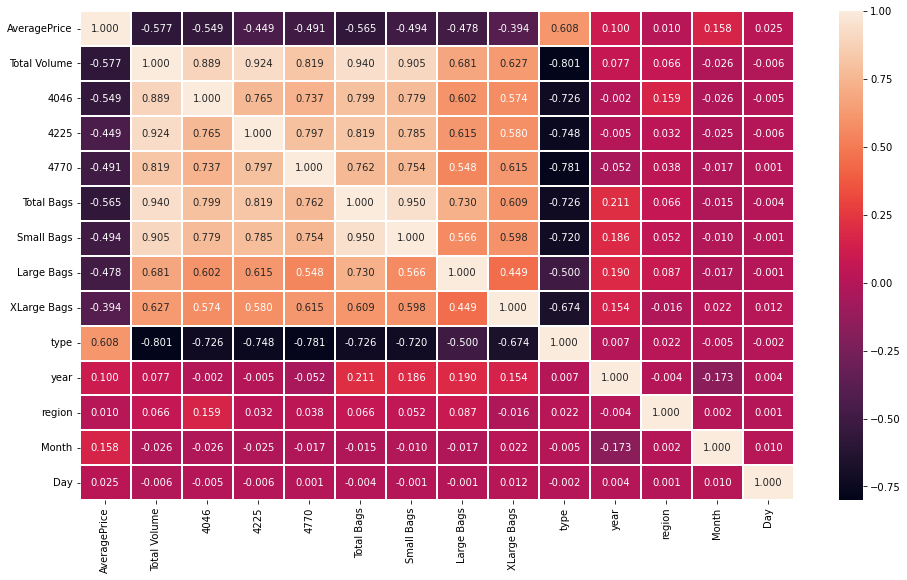

In [77]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

We can observe the relation between one feature to other.

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [78]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

### Visualizing the correlation between label and features using bar plot

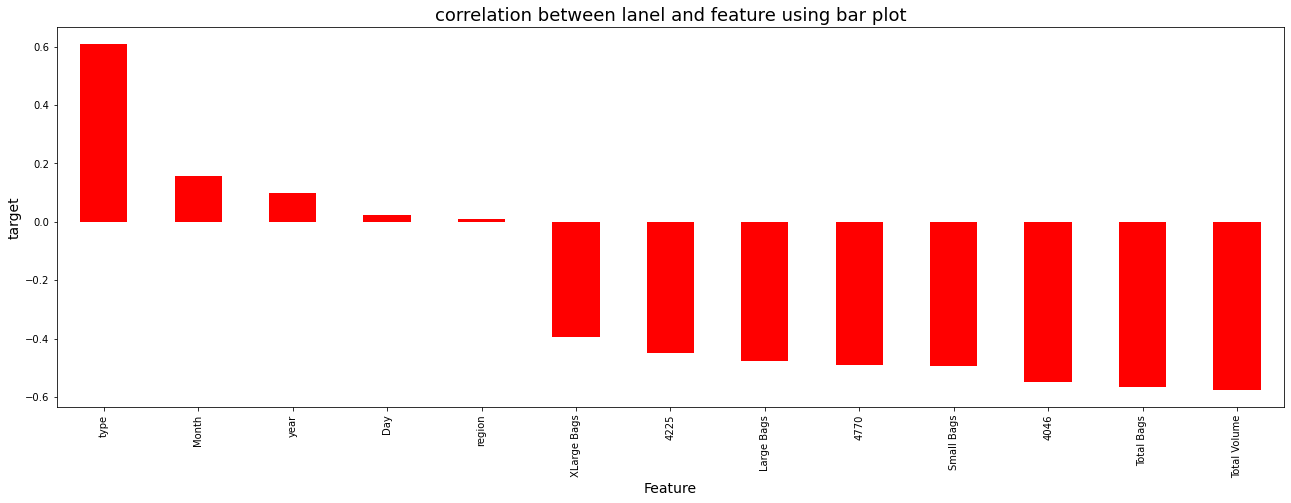

In [79]:
plt.figure(figsize=(22,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region and XLarge Bags have very less correlation with the target so we can drop these columns.

In [80]:
new_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0   -0.337064   -0.775214    -0.689355     0  2015       0     12   27  
1   -0.301038   -0.765237    -0.689355     0  2015       0     12   20  
2   -0.364044   -0.752534    -0.689355     0  2015       0     12   13  
3   -0.500341   -0.693012    -0.689355     0  2015       0     12    6  
4   -0.479918   -0.600755    -0.689355     0  2015       0     11   29

In [83]:
# Saving the data for classification
class_df=new_df

In [84]:
class_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  region  Month  Day  
0   -0.337064   -0.775214    -0.689355     0  2015       0     12   27  
1   -0.301038   -0.765237    -0.689355     0  2015       0     12   20  
2   -0.364044   -0.752534    -0.689355     0  2015       0     12   13  
3   -0.500341   -0.693012    -0.689355     0  2015       0     12    6  
4   -0.479918   -0.600755    -0.689355     0  2015       0     11   29

In [85]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

### Separating the features and label variables into x and y

In [86]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

### Standard Scalarization

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags      type      year     Month       Day  
0       -0.775214 -1.026443 -1.214908  1.641434  1.289235  
1       -0.765237 -1.026443 -1.214908  1.641434  0.491750  
2       -0.752534 -1.026443 -1.214908  1.641434 -0.305734  
3       -0.693012 -1.026443 -1.214908  1.641434 -1.103219  
4       -0.600755 -1.026443 -1.214908  1.358706  1.517088  
...           ...       ...       ...       ...       ...  
17777   -0.405895  0.974238  1.979143 -1.185845 -1.331072  
17778   -0.478556  0.974238  1.979143 -1.468572  1.403161  
17779   -0.945246  0.974238  1.979143 -1.468572  0.605677  
17780   -0.910471  0.974238  1.979143 -1.468572 -0.191808  
17781   -1.042930  0.974238  1.979143 -1.468572 -0.989293  

[17782 rows x 11 columns]

### Checking VIF values to solve multicollinearity

In [88]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    51.519431  Total Volume
1     6.752126          4046
2    11.107325          4225
3     3.890095          4770
4    34.408868    Total Bags
5    16.622534    Small Bags
6     3.460516    Large Bags
7     3.320393          type
8     1.332874          year
9     1.048738         Month
10    1.000631           Day

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags. First we will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [89]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [90]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values    Features
0    3.535569        4046
1    4.271655        4225
2    3.869884        4770
3   24.481419  Total Bags
4   16.622115  Small Bags
5    3.415743  Large Bags
6    3.130034        type
7    1.328284        year
8    1.046023       Month
9    1.000535         Day

In [91]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [92]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values    Features
0    3.516917        4046
1    4.127529        4225
2    3.869537        4770
3    4.094102  Small Bags
4    1.861818  Large Bags
5    3.127554        type
6    1.304576        year
7    1.045423       Month
8    1.000355         Day

Now the VIF values are less than 5 so we can proceed with is data

### Modeling

In [93]:
# Finding best random state

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7949841054715276  on Random_state  49


We are getting maximum R2 score 79.49% on the basis of Random state 49.

In [95]:
#Creating new train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [96]:
#Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

### Random Forest Regressor

In [97]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8670897710081303
MAE: 0.10388074976569822
MSE: 0.021921464022492967
RMSE: 0.14805898832051018
Cross_Validaton_Score 0.20472364249686942


### Support Vector Machine Regressor

In [98]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7689102070221117
MAE: 0.14249041830980091
MSE: 0.03811464791803205
RMSE: 0.1952297311324073
Cross_Validaton_Score 0.18043208617358536


### Linear Regression

In [99]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5121079666836199
MAE: 0.21832050497772312
MSE: 0.08047016197572132
RMSE: 0.28367263170020707
Cross_Validaton_Score 0.09210284810290319


### Stochastic Gradient Descent Regressor

In [100]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.511244900969533
MAE: 0.21857099192949214
MSE: 0.08061251116993993
RMSE: 0.283923424834831
Cross_Validaton_Score 0.10057178055160083


### KNeighbors Regressor

In [101]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7949841054715276
MAE: 0.13297244611059042
MSE: 0.033814166073102156
RMSE: 0.18388628571239932
Cross_Validaton_Score 0.1334207389761051


### GradientBoosting Regressor

In [102]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7151560418085157
MAE: 0.1628664353306948
MSE: 0.046980556943446994
RMSE: 0.21674998718211494
Cross_Validaton_Score 0.3546627873770424


From the difference between R2 score and Cross Validation Score we can conclude that KNeighbors Regressor as our best fitting model.

### Hyperparameter Tuning

In [103]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [104]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#### On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [105]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'distance'}

In [106]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.14805898832051018
R2_Score: 79.72442804253352


### Saving the model

In [107]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado_model,"Avocado_price.pkl")
['Avocado_price.pkl']

['Avocado_price.pkl']

### Predicting the saved model

In [108]:
# Let's load the saved model and get the prediction

model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.21721087, 1.71047824, 1.76738369, ..., 1.75012664, 1.62297766,
       1.11043122])

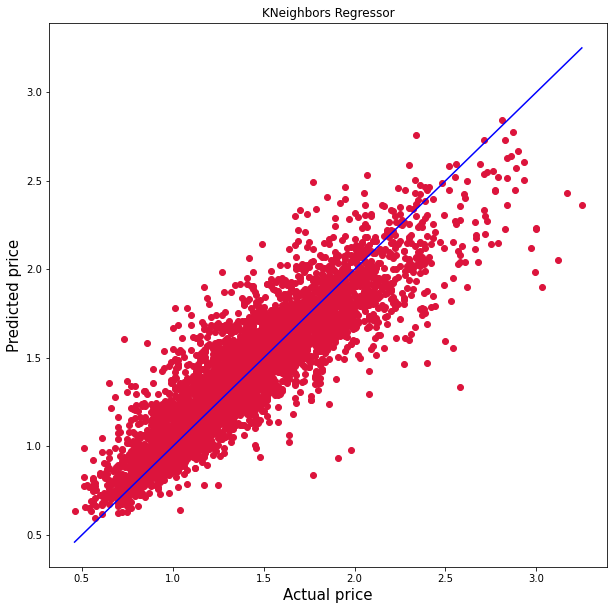

In [109]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [110]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

Original  Predicted
0         1.19   1.217211
1         1.88   1.710478
2         1.82   1.767384
3         1.04   0.974854
4         1.10   1.546133
...        ...        ...
5330      1.66   1.710109
5331      0.70   0.698093
5332      1.54   1.750127
5333      1.60   1.622978
5334      1.41   1.110431

[5335 rows x 2 columns]

Al most all values are same . So we will move to Now Classification problem

## 2.Classification Problem- Finding the Region from these data

In [114]:
#Importing the Dataset
df_cl=pd.read_csv(r"C:\DT\avocado.csv")
df_cl.head(5)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [115]:
# Dropping the irrelevant column Unnamed:0
df_cl.drop("Unnamed: 0",axis=1, inplace=True)

In [116]:
#Splitting the Date to Year, Month and Day

df_cl['Year'], df_cl['Month'], df_cl['Day'] = df_cl['Date'].str.split('-').str
df_cl.drop(columns=['Date','year'], inplace=True)
df_cl

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type            region  \
0         8603.62       93.25          0.0  conventional            Albany   
1         9408.07       97.49          0.0  conventional            Albany   
2         8042.21      103.14          0.0  conventional            Albany   
3         5677.40      133.76          0.0  conventional            Albany   
4         5986.26      197.69          0.0  conventional            Albany   
...           ...         ...          ...           ...               ...   
18244    13066.82      431.85          0.0       organic  WestTexNewMexico   
18245     8940.04      324.80          0.0       organic  WestTexNewMexico   
18246     9351.80       42.31          0.0       organic  WestTexNewMexico   
18247    10919.54       50.00          0.0       organic  WestTexNewMexico   
18248    11988.14       26.01          0.0       organic  WestTexNewMexico   

       Year Month Day  
0      2015    12  27  
1      2015    12  20  
2      2015    12  13  
3      2015    12  06  
4      2015    11  29  
...     ...   ...  ..  
18244  2018    02  04  
18245  2018    01  28  
18246  2018    01  21  
18247  2018    01  14  
18248  2018    01  07  

[18249 rows x 14 columns]

In [117]:
#Converting Object datatype for column Yesr to integer type after splitting.

df_cl['Year']=df_cl['Year'].astype(int)
df_cl['Month']=df_cl['Month'].astype(int)
df_cl['Date']=df_cl['Day'].astype(int)
df_cl.drop(columns=['Day'], inplace=True)

Now Let's separate the Numerical and Catagorical columns

In [118]:
Catg_data = []
for x in df_cl.dtypes.index:
    if df_cl.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['type', 'region']

In [119]:
Num_data = []
for x in df_cl.dtypes.index:
    if df_cl.dtypes[x] !='object':
        Num_data.append(x)
Num_data

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Date']

Here 'region' is the target variable

In [120]:
df_cl['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [121]:
df_cl["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

### Outliers

In first case we have Outliers present in the daraset. Let's remove them

In [122]:
# Features containing outliers
features = df_cl[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [123]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.227716  0.230816  0.199902  0.212091    0.234170    0.232647   
1          0.230427  0.231103  0.208054  0.211997    0.233350    0.231568   
2          0.212085  0.231007  0.154478  0.211325    0.234730    0.233399   
3          0.223444  0.230741  0.185350  0.211864    0.237096    0.236568   
4          0.231538  0.230891  0.208719  0.211834    0.236718    0.236154   
...             ...       ...       ...       ...         ...         ...   
18244      0.241373  0.230017  0.243857  0.212540    0.229301    0.226665   
18245      0.242296  0.230693  0.242277  0.212540    0.233594    0.232196   
18246      0.242331  0.230693  0.243090  0.205766    0.233463    0.231644   
18247      0.241625  0.230428  0.242651  0.205774    0.231866    0.229543   
18248      0.241253  0.229347  0.243170  0.210450    0.230807    0.228111   

       Large Bags  XLarge Bags  
0        0.222352      0.17558  
1        0.222335      0.17558  
2        0.222311      0.17558  
3        0.222186      0.17558  
4        0.221924      0.17558  
...           ...          ...  
18244    0.220964      0.17558  
18245    0.221403      0.17558  
18246    0.222561      0.17558  
18247    0.222529      0.17558  
18248    0.222628      0.17558  

[18249 rows x 8 columns]

In [124]:
# Creating new dataframe
new_df1 = df_cl[(z<3).all(axis=1)] 
new_df1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type            region  \
0         8603.62       93.25          0.0  conventional            Albany   
1         9408.07       97.49          0.0  conventional            Albany   
2         8042.21      103.14          0.0  conventional            Albany   
3         5677.40      133.76          0.0  conventional            Albany   
4         5986.26      197.69          0.0  conventional            Albany   
...           ...         ...          ...           ...               ...   
18244    13066.82      431.85          0.0       organic  WestTexNewMexico   
18245     8940.04      324.80          0.0       organic  WestTexNewMexico   
18246     9351.80       42.31          0.0       organic  WestTexNewMexico   
18247    10919.54       50.00          0.0       organic  WestTexNewMexico   
18248    11988.14       26.01          0.0       organic  WestTexNewMexico   

       Year  Month  Date  
0      2015     12    27  
1      2015     12    20  
2      2015     12    13  
3      2015     12     6  
4      2015     11    29  
...     ...    ...   ...  
18244  2018      2     4  
18245  2018      1    28  
18246  2018      1    21  
18247  2018      1    14  
18248  2018      1     7  

[17782 rows x 14 columns]

In [125]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [126]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [127]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [128]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [129]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [130]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [131]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [132]:
new_df1.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags          type  region  Year  Month  Date  
0   -0.337064   -0.775214  conventional  Albany  2015     12    27  
1   -0.301038   -0.765237  conventional  Albany  2015     12    20  
2   -0.364044   -0.752534  conventional  Albany  2015     12    13  
3   -0.500341   -0.693012  conventional  Albany  2015     12     6  
4   -0.479918   -0.600755  conventional  Albany  2015     11    29

### Encoding Catagorical Data

In [133]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)
new_df1[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

### Correlation using HEAT map

In [134]:
cor = new_df1.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Date              0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags      type    region  \
AveragePrice   -0.564616   -0.493621   -0.477879  0.608447  0.010428   
Total Volume    0.939776    0.905098    0.681427 -0.800828  0.065709   
4046            0.799354    0.778765    0.601899 -0.725826  0.159390   
4225            0.818511    0.784901    0.614878 -0.747722  0.032273   
4770            0.761641    0.754305    0.548457 -0.780988  0.037805   
Total Bags      1.000000    0.949901    0.729652 -0.725686  0.065996   
Small Bags      0.949901    1.000000    0.566307 -0.720466  0.051985   
Large Bags      0.729652    0.566307    1.000000 -0.500026  0.086573   
type           -0.725686   -0.720466   -0.500026  1.000000  0.021970   
region          0.065996    0.051985    0.086573  0.021970  1.000000   
Year            0.210924    0.185955    0.190295  0.007399 -0.003610   
Month          -0.014571   -0.010260   -0.016942 -0.005044  0.002175   
Date           -0.003703   -0.000535   -0.000876 -0.002469  0.000751   

                  Year     Month      Date  
AveragePrice  0.099910  0.157900  0.024742  
Total Volume  0.076584 -0.026332 -0.006248  
4046         -0.002396 -0.025919 -0.004558  
4225         -0.004533 -0.024708 -0.005919  
4770         -0.051657 -0.017377  0.001383  
Total Bags    0.210924 -0.014571 -0.003703  
Small Bags    0.185955 -0.010260 -0.000535  
Large Bags    0.190295 -0.016942 -0.000876  
type          0.007399 -0.005044 -0.002469  
region       -0.003610  0.002175  0.000751  
Year          1.000000 -0.173166  0.004044  
Month        -0.173166  1.000000  0.010456  
Date          0.004044  0.010456  1.000000

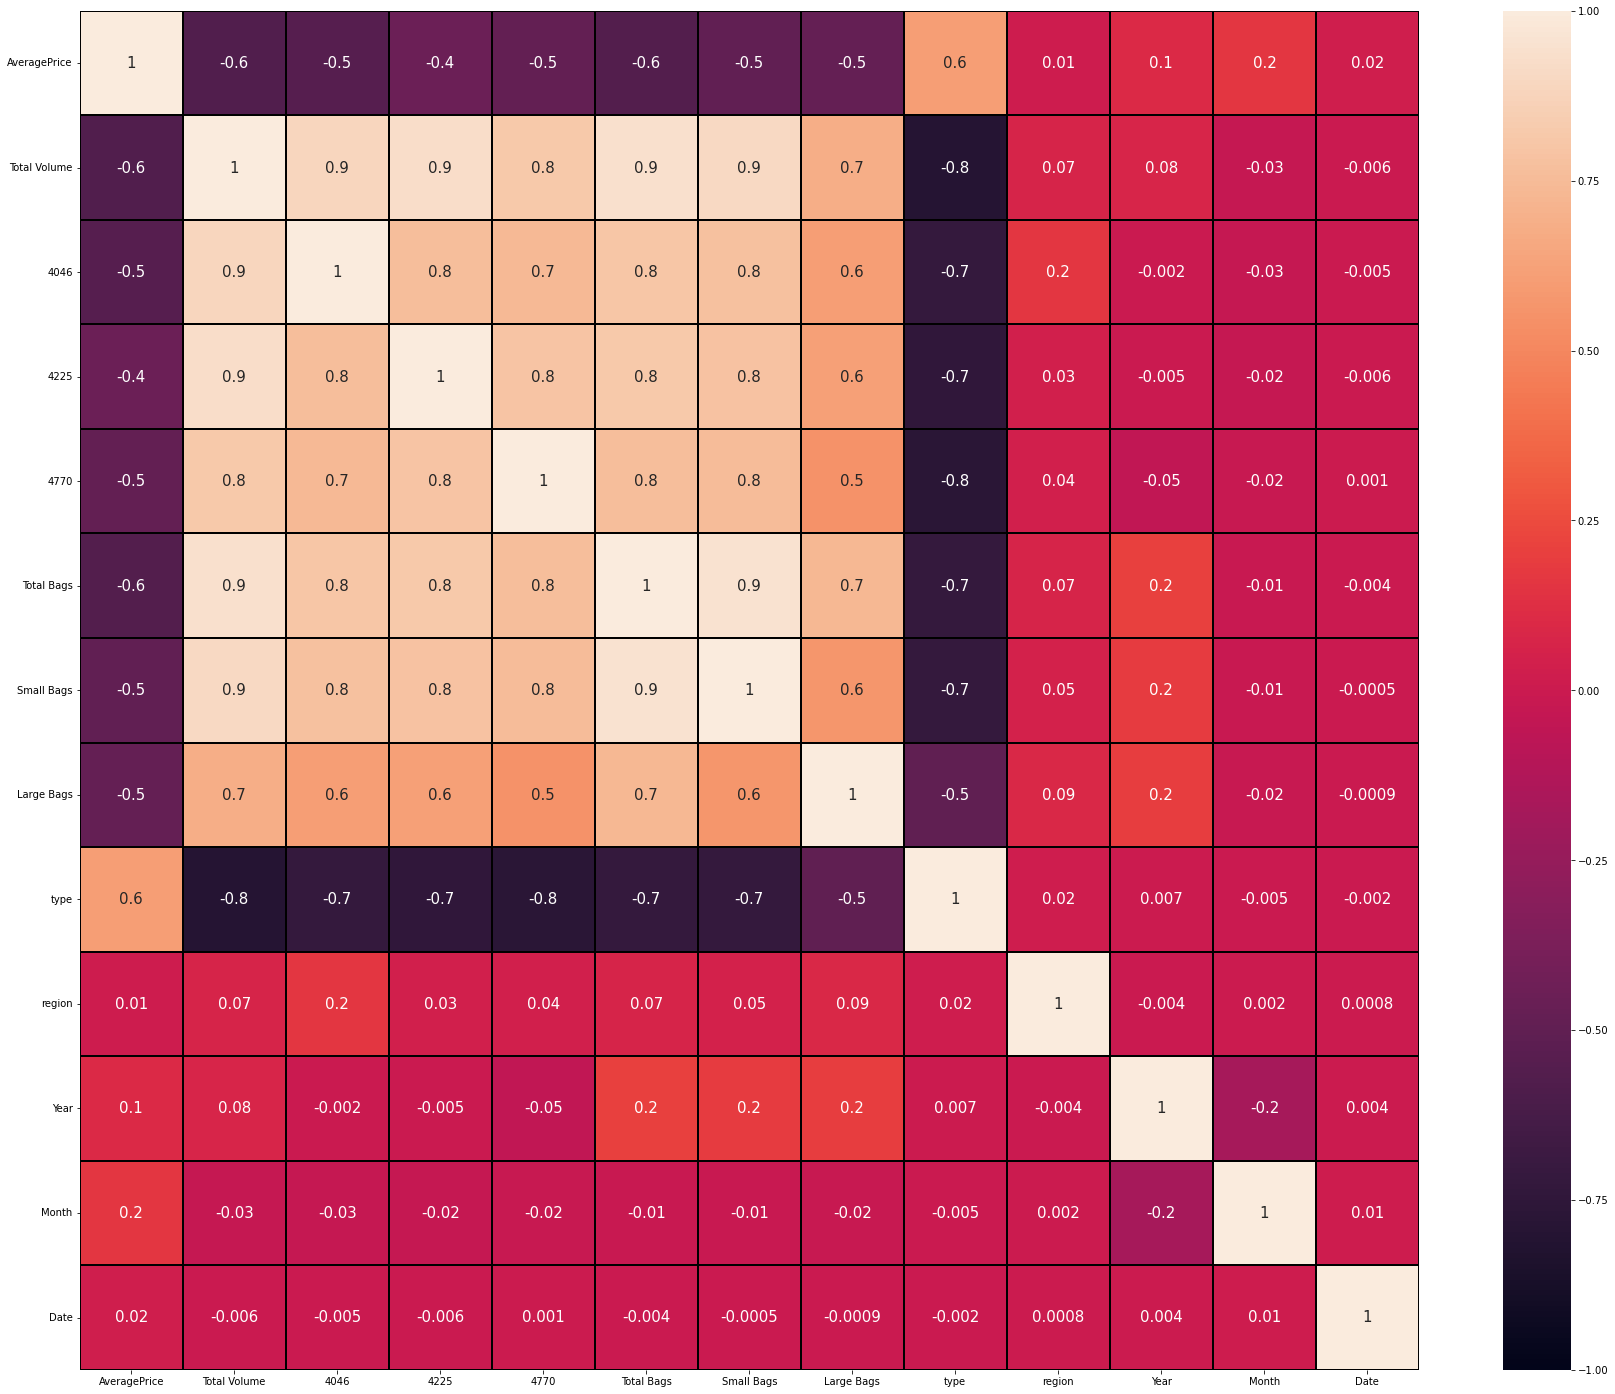

In [135]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

In [136]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Date            0.000751
Year           -0.003610
Name: region, dtype: float64

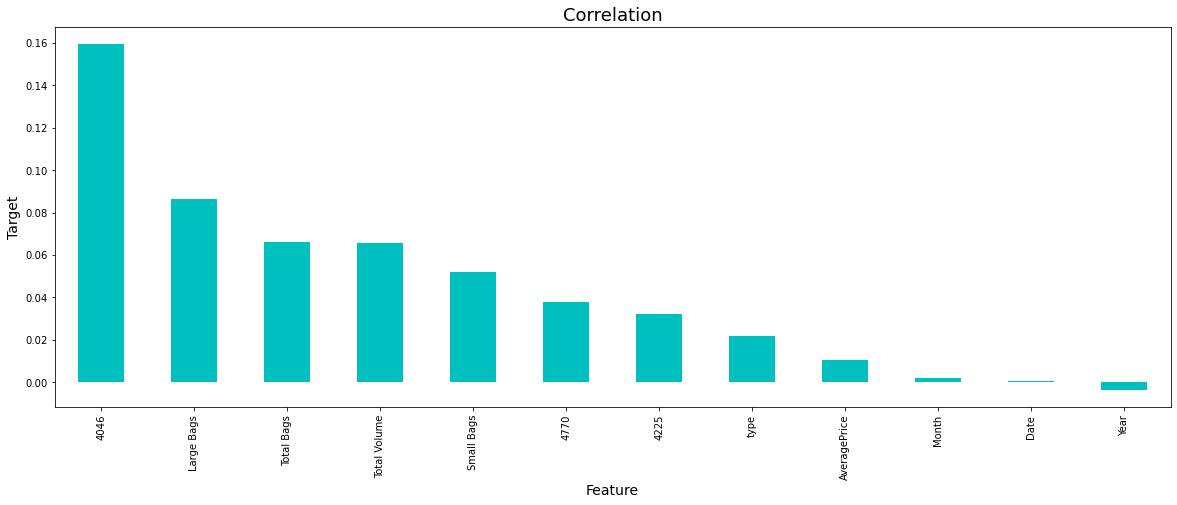

In [137]:
plt.figure(figsize=(20,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above bar plot, we can see that there is no relation with Date, Year, Month and type. So we will drop these column.

In [138]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Date",axis=1, inplace=True)
new_df1.drop("Year",axis=1, inplace=True)

### Data preprocessing

Separating the independent and target variables into x and y

In [139]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [140]:
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0              1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1              1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2              0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3              1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4              1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
18244          1.63     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
18245          1.71     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
18246          1.87     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
18247          1.93     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
18248          1.62     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  type  
0       -0.337064   -0.775214     0  
1       -0.301038   -0.765237     0  
2       -0.364044   -0.752534     0  
3       -0.500341   -0.693012     0  
4       -0.479918   -0.600755     0  
...           ...         ...   ...  
18244   -0.165765   -0.405895     1  
18245   -0.321645   -0.478556     1  
18246   -0.303466   -0.945246     1  
18247   -0.240252   -0.910471     1  
18248   -0.201685   -1.042930     1  

[17782 rows x 9 columns]

#### Scaling data using Standar Scaler

In [141]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0     -0.212660     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1     -0.162942     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2     -1.207026      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3     -0.834139      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4     -0.336956     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags      type  
0   -0.337064   -0.775214 -1.026443  
1   -0.301038   -0.765237 -1.026443  
2   -0.364044   -0.752534 -1.026443  
3   -0.500341   -0.693012 -1.026443  
4   -0.479918   -0.600755 -1.026443

#### Variance Inflation Factor(VIF)

In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values      Features
0    1.941903  AveragePrice
1   52.803808  Total Volume
2    6.694036          4046
3   11.900149          4225
4    3.756094          4770
5   34.110791    Total Bags
6   17.194519    Small Bags
7    3.434390    Large Bags
8    3.717587          type

In [143]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [144]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.884951  AveragePrice
1    3.485772          4046
2    4.355346          4225
3    3.742073          4770
4   25.424143    Total Bags
5   17.184510    Small Bags
6    3.381470    Large Bags
7    3.617215          type

In [145]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)

In [146]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.782355  AveragePrice
1    3.485146          4046
2    4.167858          4225
3    3.738406          4770
4    3.509222    Small Bags
5    1.840231    Large Bags
6    3.603878          type

### Modeling

#### Finding best random state

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [148]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7944219523166891  on Random_state  102


Here we are getting accuracy score of 79.44% with Random state 102

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

#### Logistic Regression

In [150]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.46041385515069727
[[47  0  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0  0 44 ...  0  0  6]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 52  0]
 [ 0  3  2 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.49      0.57      0.53        82
           1       0.23      0.44      0.30        87
           2       0.60      0.54      0.57        82
           3       0.57      0.34      0.43        91
           4       0.38      0.57      0.46        67
           5       0.53      0.34      0.41        89
           6       0.78      0.86      0.82        58
           7       0.48      0.51      0.49        86
           8       0.76      0.75      0.75        91
           9       0.43      0.73      0.54        88
          10       0.50      0.35      0.41        78
          11       0.46      0.49      0.48        80
          12       0.41      0.50      0.45       104
          13       0.11      0.04      0.06        79
          14 

### KNeighbors Classifier

In [151]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8459289248762933
[[75  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  1]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  0  1 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        82
           1       0.71      0.82      0.76        87
           2       0.90      0.99      0.94        82
           3       0.85      0.76      0.80        91
           4       0.81      0.91      0.86        67
           5       0.85      0.76      0.80        89
           6       0.95      0.98      0.97        58
           7       0.82      0.94      0.88        86
           8       1.00      0.98      0.99        91
           9       0.68      0.78      0.73        88
          10       0.69      0.81      0.75        78
          11       0.77      0.99      0.87        80
          12       0.90      0.91      0.91       104
          13       0.71      0.67      0.69        79
          14  

### Decision Tree Classifier

In [152]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7917228969860549
[[66  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  0]
 [ 0  0 74 ...  0  0  1]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 58  1]
 [ 0  3  0 ...  0  0 52]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.67      0.74      0.70        87
           2       0.94      0.90      0.92        82
           3       0.70      0.76      0.73        91
           4       0.83      0.85      0.84        67
           5       0.65      0.70      0.67        89
           6       0.95      0.98      0.97        58
           7       0.78      0.80      0.79        86
           8       0.97      0.92      0.94        91
           9       0.82      0.78      0.80        88
          10       0.61      0.69      0.65        78
          11       0.76      0.86      0.81        80
          12       0.86      0.85      0.85       104
          13       0.78      0.81      0.80        79
          14  

### Random Forest Classifier

In [153]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8861898335582546
[[73  0  0 ...  0  0  0]
 [ 0 74  0 ...  0  0  0]
 [ 0  0 82 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 59  0]
 [ 0  1  0 ...  0  0 60]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        82
           1       0.79      0.85      0.82        87
           2       0.94      1.00      0.97        82
           3       0.93      0.82      0.87        91
           4       0.91      0.94      0.93        67
           5       0.85      0.80      0.82        89
           6       0.98      0.98      0.98        58
           7       0.93      0.92      0.92        86
           8       0.99      0.98      0.98        91
           9       0.85      0.85      0.85        88
          10       0.78      0.88      0.83        78
          11       0.85      0.95      0.90        80
          12       0.93      0.94      0.94       104
          13       0.82      0.87      0.85        79
          14  

### Support Vector Machine Classifier

In [154]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7708052181736392
[[75  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  0]
 [ 0  0 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 58  0]
 [ 0  0  2 ...  0  0 46]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80        82
           1       0.54      0.62      0.58        87
           2       0.97      0.93      0.95        82
           3       0.87      0.66      0.75        91
           4       0.71      0.84      0.77        67
           5       0.77      0.65      0.71        89
           6       0.97      0.97      0.97        58
           7       0.78      0.81      0.80        86
           8       0.99      0.95      0.97        91
           9       0.70      0.83      0.76        88
          10       0.56      0.74      0.64        78
          11       0.77      0.93      0.84        80
          12       0.88      0.93      0.91       104
          13       0.59      0.65      0.61        79
          14  

### Gradient Boosting Classifier

In [155]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.8178137651821862
[[69  0  0 ...  0  0  0]
 [ 0 64  0 ...  0  0  1]
 [ 0  0 79 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 56  0]
 [ 0  0  0 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        82
           1       0.72      0.74      0.73        87
           2       0.96      0.96      0.96        82
           3       0.84      0.68      0.75        91
           4       0.80      0.91      0.85        67
           5       0.76      0.83      0.79        89
           6       0.97      1.00      0.98        58
           7       0.86      0.88      0.87        86
           8       0.99      0.91      0.95        91
           9       0.85      0.76      0.80        88
          10       0.63      0.79      0.70        78
          11       0.74      0.89      0.81        80
          12       0.88      0.88      0.88       104
          13       0.75      0.81      0.78        79
          14  

### AdaBoost Classifier

In [156]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.06275303643724696
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  3  0  7]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 27  0  0]
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ... 12  0 21]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        82
           1       0.00      0.00      0.00        87
           2       0.00      0.00      0.00        82
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        67
           5       0.00      0.00      0.00        89
           6       0.00      0.00      0.00        58
           7       0.00      0.00      0.00        86
           8       0.00      0.00      0.00        91
           9       0.63      0.19      0.30        88
          10       0.00      0.00      0.00        78
          11       0.00      0.00      0.00        80
          12       0.00      0.00      0.00       104
          13       0.04      0.49      0.07        79
          14 

### Checking the cross validation score

In [157]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.34141362600970915


In [158]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.620281733478845


In [159]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5521271922820162


In [160]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.681524698364068


In [161]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6252873103400731


In [162]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.6018964490557601


In [163]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.0602865972228591


From the above observation, looking at the accuracy score and the cross validation score we conclude that Logistic Regression is our best fitting model

### Hyperparameter tuning

In [164]:
from sklearn.model_selection import GridSearchCV

In [165]:
# Logistic Regression
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [166]:
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [167]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [168]:
GCV.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [169]:
Avacado_region = LogisticRegression(C= 1000.0, penalty="l2",solver = 'newton-cg' )
Avacado_region.fit(x_train, y_train)
pred = Avacado_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

49.707602339181285


After tuning, our best model score has increased

### Saving the model

In [170]:
# Saving the model using .pkl
import joblib
joblib.dump(Avacado_region,"Avocado_P_Region.pkl")

['Avocado_P_Region.pkl']

## Thank You !